In [3]:
import pandas as pd
import numpy as np

The columns :

1. Vintage :
  Possible prompt; John has been a customer for

In [4]:
df = pd.read_csv("churn_prediction.csv")
df.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
5,7,1923,42,Female,0.0,self_employed,1096.0,2,1666,15202.20,...,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01
6,8,2048,72,Male,0.0,retired,1020.0,1,1,7006.93,...,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24
7,9,2009,46,Male,0.0,self_employed,623.0,2,317,10096.58,...,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0,2019-07-12
8,10,2053,31,Male,0.0,salaried,1096.0,2,4110,1355.86,...,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0,2019-12-12
9,11,2295,40,Male,3.0,self_employed,1020.0,2,38,4957.95,...,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0,2019-12-31


In [5]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2091.144105,48.208336,0.347236,796.109576,2.225530,925.975019,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,272.676775,17.807163,0.997661,432.872102,0.660443,937.799129,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,73.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1958.000000,36.000000,0.000000,409.000000,2.000000,176.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000
50%,15150.500000,2154.000000,46.000000,0.000000,834.000000,2.000000,572.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,2292.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,2476.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [6]:
df.drop(['customer_id'], axis = 1)

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT


In [7]:
df['branch_code'].unique()

array([ 755, 3214,   41, ..., 3005, 3133, 4104], dtype=int64)

<Axes: xlabel='customer_nw_category'>

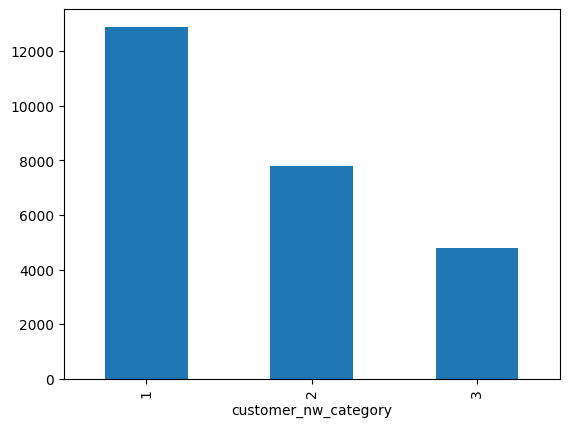

In [8]:
df.groupby("customer_nw_category")["current_balance"].mean().plot(kind="bar")

<Axes: xlabel='customer_nw_category'>

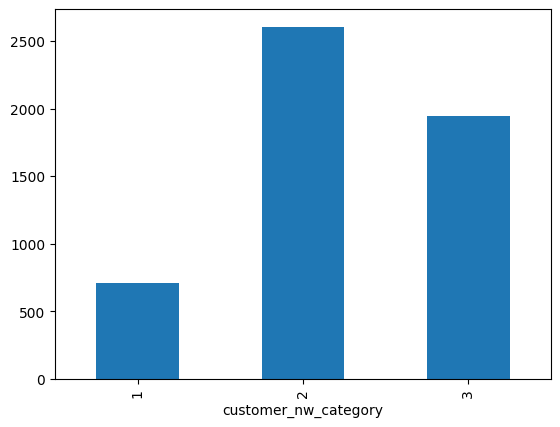

In [9]:
df.groupby("customer_nw_category")["churn"].sum().plot(kind="bar")


- Data cleaning :

1. Drop customer id
2. Vintage : Normalize
3. Age : Normalize
4. Gender : Impute with "Other" as a category
5. Dependents : Impute with 0
6. Occupation : Drop nulls
7. Drop city
6. One hot Customer_nw_category
7. Drop branch_code
8. Normalize current_balance
9. Normalize previous_month_end_balance
10. Normalize average_monthly_balance_prevQ
11. Normalize average_monthly_balance_prevQ2
12. Normalize current_month_credit
13. Normalize previous_month_credit
14. Normalize current_month_debit
15. Normalize previous_month_debit
16. Normalize current_month_balance
17. Normalize previous_month_balance
18. churn
19. Days since last churn

In [10]:
df['vintage'] = (df['vintage'] - df['vintage'].mean()) / df['vintage'].std()
df['age'] = (df['age'] - df['age'].mean()) / df['age'].std()

df['gender'].fillna('other', inplace=True)

df = pd.get_dummies(df, columns=['gender'], drop_first=True)

df['dependents'].fillna(0, inplace=True)

df.dropna(subset=['occupation'], inplace=True)

df = pd.get_dummies(df, columns=['occupation'], drop_first=True)
df = df.drop('city', axis=1)

df = pd.get_dummies(df, columns=['customer_nw_category'], drop_first=True)

df = df.drop('branch_code', axis=1)


In [11]:

df['current_balance'] = (df['current_balance'] - df['current_balance'].mean()) / df['current_balance'].std()
df['previous_month_end_balance'] = (df['previous_month_end_balance'] - df['previous_month_end_balance'].mean()) / df['previous_month_end_balance'].std()
df['average_monthly_balance_prevQ'] = (df['average_monthly_balance_prevQ'] - df['average_monthly_balance_prevQ'].mean()) / df['average_monthly_balance_prevQ'].std()
df['current_month_credit'] = (df['current_month_credit'] - df['current_month_credit'].mean()) / df['current_month_credit'].std()
df['previous_month_credit'] = (df['previous_month_credit'] - df['previous_month_credit'].mean()) / df['previous_month_credit'].std()
df['current_month_debit'] = (df['current_month_debit'] - df['current_month_debit'].mean()) / df['current_month_debit'].std()
df['previous_month_debit'] = (df['previous_month_debit'] - df['previous_month_debit'].mean()) / df['previous_month_debit'].std()
df['current_month_balance'] = (df['current_month_balance'] - df['current_month_balance'].mean()) / df['current_month_balance'].std()
df['previous_month_balance'] = (df['previous_month_balance'] - df['previous_month_balance'].mean()) / df['previous_month_balance'].std()
df['average_monthly_balance_prevQ2'] = (df['average_monthly_balance_prevQ2'] - df['average_monthly_balance_prevQ2'].mean()) / df['average_monthly_balance_prevQ2'].std()


In [12]:
import datetime
df['last_transaction'] = df['last_transaction'].str.replace('2019', '2023')

# Recalculate days since last transaction
df['last_transaction'] = pd.to_datetime(df['last_transaction'])
df['days_since_last_transaction'] = (datetime.datetime.now() - df['last_transaction']).dt.days
df.dropna(subset = "days_since_last_transaction", inplace = True)

In [13]:
df

,customer_id,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,...,last_transaction,gender_Male,gender_other,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3,days_since_last_transaction
0,1,0.036145,0.999130,0.0,-0.139994,-0.143093,-0.145822,-0.154164,-0.044473,-0.109674,...,2023-05-21,1,0,0,0,1,0,1,0,321.0
1,2,0.941979,-0.741743,0.0,-0.045800,0.030785,0.009493,0.154907,-0.044469,-0.109662,...,2023-11-01,1,0,0,0,1,0,1,0,157.0
3,5,0.872300,2.346902,0.0,-0.120032,-0.123099,-0.130492,-0.166632,-0.044470,-0.109665,...,2023-08-06,0,1,0,0,1,0,1,0,244.0
4,6,-1.878209,-0.348643,2.0,-0.152716,-0.144460,-0.141300,-0.142274,-0.044472,-0.085636,...,2023-11-03,1,0,0,0,1,0,0,1,155.0
5,7,-0.616643,-0.348643,0.0,0.189271,0.207272,0.191054,0.193770,-0.044471,-0.109668,...,2023-11-01,0,0,0,0,1,0,1,0,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28375,30295,1.125347,-0.348643,0.0,0.004591,-0.015462,0.016430,-0.095959,-0.044469,-0.106649,...,2023-11-04,1,0,0,0,1,0,1,0,154.0
28377,30297,0.857630,-2.145672,0.0,-0.149153,-0.152266,-0.125650,-0.116451,-0.044472,-0.109670,...,2023-10-22,0,0,0,0,0,1,1,0,167.0
28378,30298,-2.032238,-0.797900,0.0,-0.082845,-0.080450,-0.091684,-0.086084,-0.044454,-0.109603,...,2023-12-17,0,0,0,0,1,0,1,0,111.0
28379,30299,1.044665,-0.067857,0.0,1.394588,1.286113,1.127600,0.422735,0.015994,0.020974,...,2023-12-31,1,0,0,1,0,0,1,0,97.0


In [14]:
df['dependents'].value_counts()

0.0     20825
2.0      2067
1.0      1319
3.0       659
4.0       169
5.0        34
6.0         8
7.0         3
9.0         1
52.0        1
36.0        1
50.0        1
8.0         1
25.0        1
32.0        1
Name: dependents, dtype: int64

In [15]:
df['dependents'].fillna(0, inplace=True)
df[df['dependents'] <=5]

,customer_id,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,...,last_transaction,gender_Male,gender_other,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3,days_since_last_transaction
0,1,0.036145,0.999130,0.0,-0.139994,-0.143093,-0.145822,-0.154164,-0.044473,-0.109674,...,2023-05-21,1,0,0,0,1,0,1,0,321.0
1,2,0.941979,-0.741743,0.0,-0.045800,0.030785,0.009493,0.154907,-0.044469,-0.109662,...,2023-11-01,1,0,0,0,1,0,1,0,157.0
3,5,0.872300,2.346902,0.0,-0.120032,-0.123099,-0.130492,-0.166632,-0.044470,-0.109665,...,2023-08-06,0,1,0,0,1,0,1,0,244.0
4,6,-1.878209,-0.348643,2.0,-0.152716,-0.144460,-0.141300,-0.142274,-0.044472,-0.085636,...,2023-11-03,1,0,0,0,1,0,0,1,155.0
5,7,-0.616643,-0.348643,0.0,0.189271,0.207272,0.191054,0.193770,-0.044471,-0.109668,...,2023-11-01,0,0,0,0,1,0,1,0,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28375,30295,1.125347,-0.348643,0.0,0.004591,-0.015462,0.016430,-0.095959,-0.044469,-0.106649,...,2023-11-04,1,0,0,0,1,0,1,0,154.0
28377,30297,0.857630,-2.145672,0.0,-0.149153,-0.152266,-0.125650,-0.116451,-0.044472,-0.109670,...,2023-10-22,0,0,0,0,0,1,1,0,167.0
28378,30298,-2.032238,-0.797900,0.0,-0.082845,-0.080450,-0.091684,-0.086084,-0.044454,-0.109603,...,2023-12-17,0,0,0,0,1,0,1,0,111.0
28379,30299,1.044665,-0.067857,0.0,1.394588,1.286113,1.127600,0.422735,0.015994,0.020974,...,2023-12-31,1,0,0,1,0,0,1,0,97.0


In [16]:
df.to_csv("Cleaned_Data.csv", index = False)

In [17]:
	•	(Current - Q) vs (Current - Q2) ---> Hue: Churn


SyntaxError: invalid character '•' (U+2022) (2767118338.py, line 1)

In [ ]:
import plotly.express as px

# Binning Age into appropriate bins starting at 10
bins = list(range(10, 100, 10))
df['Age_bin'] = pd.cut(df['age'], bins=bins, right=False)
df['Age_bin'] = df['Age_bin'].astype(str)
# Calculate churn rate by Age bin
churn_rate = df[df['Age_bin'] != "nan"].groupby('Age_bin')['churn'].mean().reset_index()

# Plot churn rate by Age
px.bar(churn_rate, x='Age_bin', y='churn',
             title='Churn Rate by Age',
             color_discrete_sequence=['blue'])

In [ ]:
churn_rate_gender = df.groupby('gender')['churn'].mean().reset_index()

# Plot churn rate by Gender
fig = px.bar(churn_rate_gender, x='gender', y='churn',
             title='Churn Rate by Gender',
             color_discrete_sequence=['green'])

fig.show()

In [ ]:
df['occupation'].value_counts()

occupation
self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: count, dtype: int64

In [ ]:
churn_rate_occupation = df.groupby('occupation')['churn'].mean().reset_index()

# Plot churn rate by Occupation
fig = px.bar(churn_rate_occupation, x='occupation', y='churn',
             title='Churn Rate by Occupation',
             color_discrete_sequence=['blue'])

fig.show()

In [ ]:
churn_rate_dependents = df.groupby('dependents')['churn'].mean().reset_index()

# Plot churn rate by Dependents
fig = px.bar(churn_rate_dependents, x='dependents', y='churn',
             title='Churn Rate by Number of Dependents',
             color_discrete_sequence=['green'])

fig.show()

In [ ]:
df['dependents'].value_counts()

dependents
0.0    23898
2.0     2150
1.0     1395
3.0      701
4.0      179
5.0       41
6.0        8
7.0        3
Name: count, dtype: int64

In [ ]:
df['vintage'].describe()

count    28382.000000
mean      2091.144105
std        272.676775
min         73.000000
25%       1958.000000
50%       2154.000000
75%       2292.000000
max       2476.000000
Name: vintage, dtype: float64

In [ ]:
# Create a new column for Vintage bins
min_value = 73
max_value = 2476
num_bins = 10
bins = np.linspace(min_value, max_value, num_bins+1)

# Convert bins to integer type
bins = [int(b) for b in bins]
df['Vintage_Bins'] = pd.cut(df['vintage'], bins=bins)
df['Vintage_Bins'] = df['Vintage_Bins'].astype(str)
# Calculate churn rate by Vintage bins
churn_rate_vintage_bins = df[(df['Vintage_Bins'] != "nan") & (df['Vintage_Bins'] != "(73, 313]")].groupby('Vintage_Bins')['churn'].mean().reset_index()

px.bar(churn_rate_vintage_bins, x='Vintage_Bins', y='churn',
             title='Churn Rate by Vintage Bins',
             color_discrete_sequence=['blue'])


In [ ]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction', 'Vintage_Bins'],
      dtype='object')

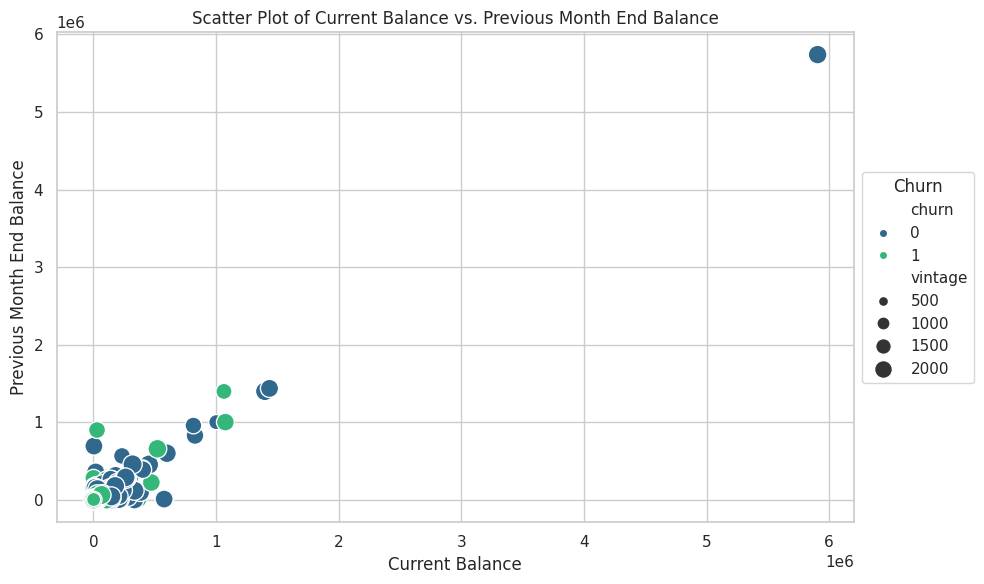

In [ ]:
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='current_balance', y='previous_month_end_balance', hue='churn', size='vintage', sizes=(20, 200), palette='viridis')

# Set the title and labels
plt.title('Scatter Plot of Current Balance vs. Previous Month End Balance')
plt.xlabel('Current Balance')
plt.ylabel('Previous Month End Balance')

# Move the legend to a better position
plt.legend(title='Churn', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction', 'Vintage_Bins'],
      dtype='object')

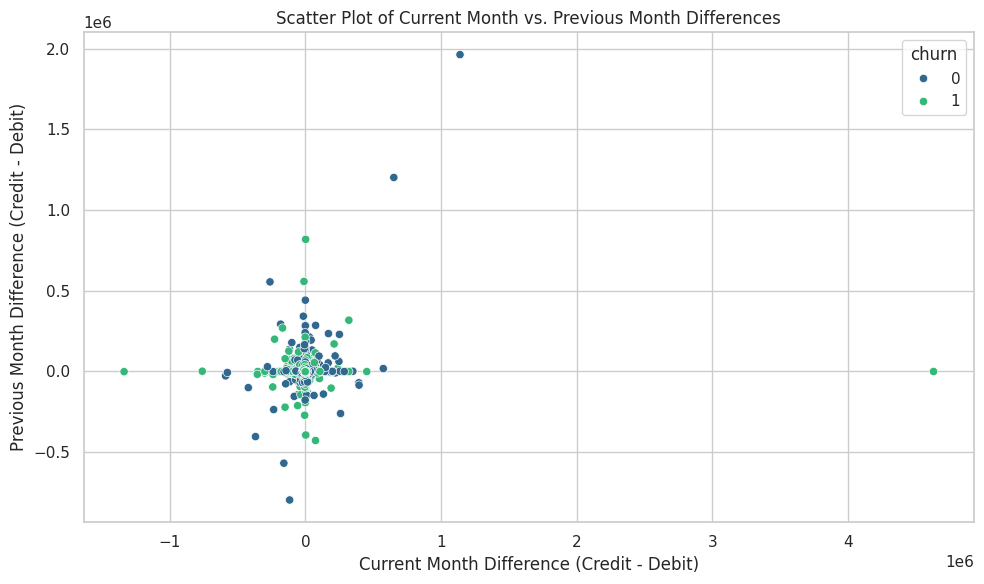

In [ ]:
df['current_diff'] = df['current_month_credit'] - df['current_month_debit']
df['previous_diff'] = df['previous_month_credit'] - df['previous_month_debit']

# Set the style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='current_diff', y='previous_diff', hue='churn', palette='viridis')

# Set the title and labels
plt.title('Scatter Plot of Current Month vs. Previous Month Differences')
plt.xlabel('Current Month Difference (Credit - Debit)')
plt.ylabel('Previous Month Difference (Credit - Debit)')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction', 'Vintage_Bins', 'current_diff', 'previous_diff'],
      dtype='object')

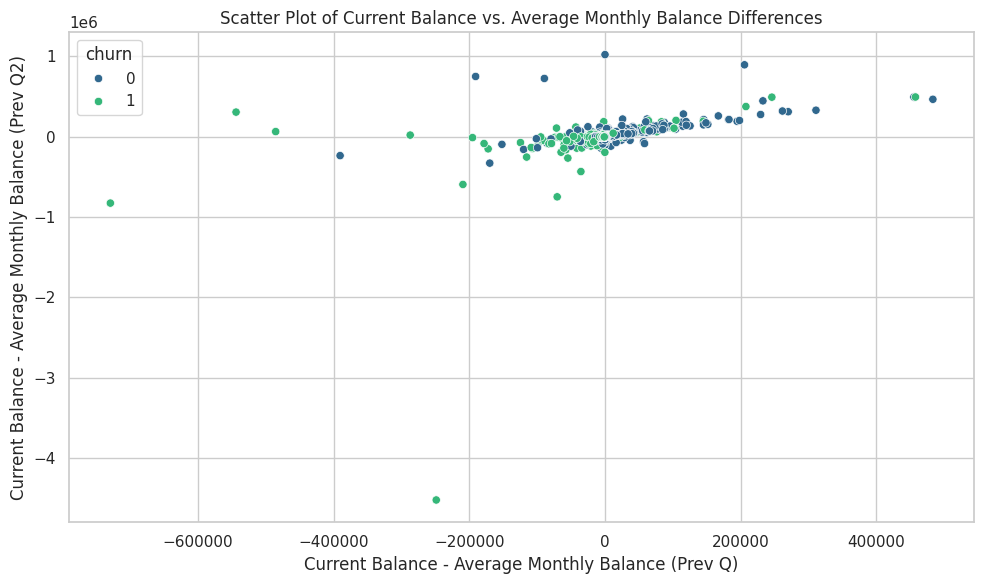

In [ ]:
# Calculate the differences for previous quarter and previous quarter 2
df['diff_prevQ'] = df['current_balance'] - df['average_monthly_balance_prevQ']
df['diff_prevQ2'] = df['current_balance'] - df['average_monthly_balance_prevQ2']

# Set the style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='diff_prevQ', y='diff_prevQ2', hue='churn', palette='viridis')

# Set the title and labels
plt.title('Scatter Plot of Current Balance vs. Average Monthly Balance Differences')
plt.xlabel('Current Balance - Average Monthly Balance (Prev Q)')
plt.ylabel('Current Balance - Average Monthly Balance (Prev Q2)')

# Show the plot
plt.tight_layout()
plt.show()
